In [2]:
import gRAMAkit as gR
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

## Volumen de interés
* Crearemos un espacio que replique el volumen donde se hará la simulación.
    * El universo será un paralelepípedo de 40 m x 40 m de área en el plano (x,y) y 14 m de altura en z.
    * El volumen está contenido en el siguiente conjunto:
        * $0<x<40~m$
        * $0<y<40~m$
        * $0>z>-14~m$
    * El espacio está dividido en voxels de dimensiones $(625.0, 625.0, 437.5)$ mm por lado. El número de cortes en cada dimensión es $(Nx,Ny,Nz)=( 64,64,32 )$

In [3]:
v=gR.Volumen(64,64,32,625,625,437.5,0,0,-14,unidad='mm',conversion2metros=0.001)

Volumen creado con celdas (Nx,Ny,Nz)=( 64 64 32 ), dimension de voxel (Lx,Ly,Lz)=( 625.0 625.0 437.5 ). Unidad de medida= mm . Factor de conversion a metros (m)= 0.001 . Todas distancias y coordenadas se suponen y operan en metros (m)


In [3]:
# Para usar cigar: son dos semiesferas unidas por un cilindro
# v.cigar(centro semiesfera 1,centro semiesfera 2,radio)
######
v.cigar(np.array([20,20,-7]),np.array([20,20,-7]),math.sqrt(3)/2)

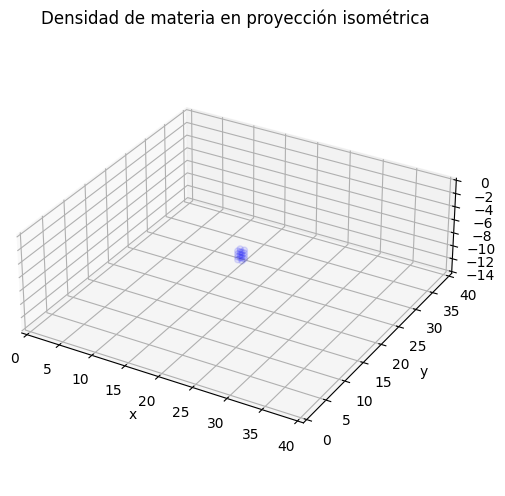

In [4]:
v.plotDensity()

In [5]:
v.saveDensity('./sphere_r87cm_l625mm_625mm_438mm_64_64_32.json')

Use la opción force=True si desea sobreescribirlo


Creado un haz cónico de rayos centrado en (Xo,Yo,Zo)= [0 0 0] 26
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 13, 14, 15, 16, 17, 17, 18, 19, 19, 20, 21, 21, 22] 322
[6.283185307179586, 3.141592653589793, 2.0943951023931953, 1.5707963267948966, 1.2566370614359172, 1.0471975511965976, 0.8975979010256552, 0.7853981633974483, 0.6981317007977318, 0.6283185307179586, 0.5711986642890533, 0.5235987755982988, 0.5235987755982988, 0.483321946706122, 0.4487989505128276, 0.41887902047863906, 0.39269908169872414, 0.36959913571644626, 0.36959913571644626, 0.3490658503988659, 0.3306939635357677, 0.3306939635357677, 0.3141592653589793, 0.2991993003418851, 0.2991993003418851, 0.28559933214452665]
[0.009686971260041522, 0.00967950295626287, 0.009667063460353861, 0.009649664279019511, 0.009627321503901597, 0.00960005579385896, 0.009567892352221472, 0.009530860899044957, 0.009488995638400336, 0.009442335220736179, 0.009390922700359808, 0.00933480548808789, 0.01004687157405019, 0.009917027180545001, 0.00979

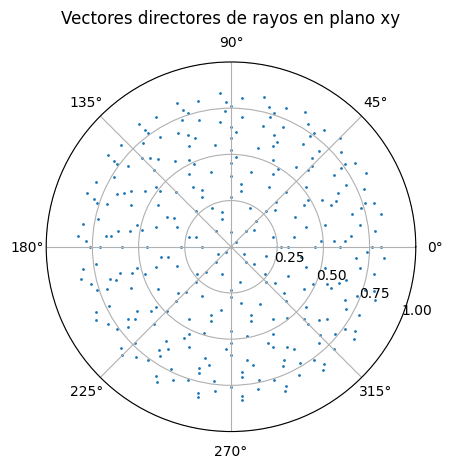

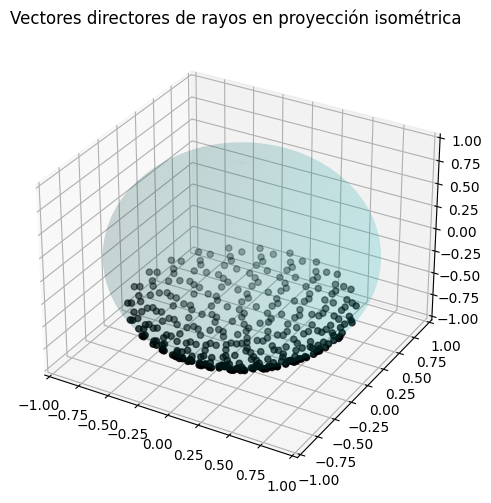

In [6]:
r=gR.Rayos(M=40,zFin=-14)

In [7]:
A=gR.muestra(v,r)

In [8]:
A.maparayosInfo

[['Density from function cigar on 2024-01-06 08:39:41',
  'ro = [20 20 -7]',
  'rf = [20 20 -7]',
  'r = 0.8660254037844386',
  'Se supone que todas las coordenadas y las distancias están en metros',
  ['Volumen físico datos (N,L,V):',
   [64, 64, 32],
   [0.625, 0.625, 0.4375],
   [0, 0, -14]]],
 ['Haz cónico de rayos (M,thetaMin,thetaMax):', 40, 0, 1.0471975511965976]]

In [9]:
A.mapaRayosEnEsfera()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
320 0.8406015979012554
320 0.7834762781009922
319 0.7891408741380268
319 0.6339441073211012
14
320 0.6174619917515956
320 0.41987890302342873
320 0.8533363412598152
279 0.8270904929146753
279 0.8270904929146695
319 0.5325872524221807
319 0.3181570021176579
319 0.8350447894543126
318 0.8086877847528056
318 0.6620672029594038
15
321 0.8336907019670987
321 0.6825878693785553
280 0.7650086036447075
280 0.7098763915009789
320 0.5669666870193685
320 0.06561368858325216
320 0.6663367948969208
279 0.5063515779893173
279 0.5063515779893082
319 0.4341003363715117
319 0.21083330660456864
319 0.823989981828776
299 0.7098763915009689
299 0.7650086036447132
318 0.43938799488663477
318 0.39276902620526616
16
321 0.7468504331052883
321 0.318569550375077
321 0.5498955709801283
280 0.5691516662863871
280 0.31400220140083834
320 0.7260762943312206
280 0.7810800651140407
320 0.3128189046765071
261 0.7381817785490004
320 0.6522040978255823
261 0.5492811534791568
279 0.314038

In [10]:
A.plano2linea()

In [37]:
A.sampleFromHistogram('histogramas/h_alta.csv',outFile='sample_alta.csv',sampleSize=.001)

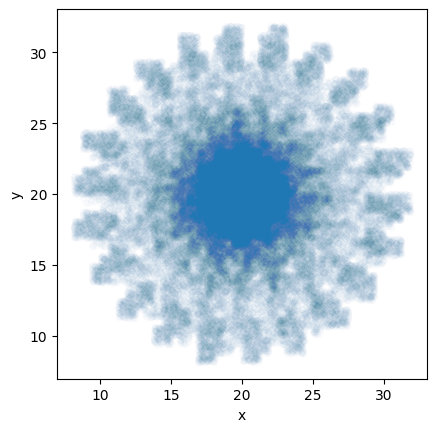

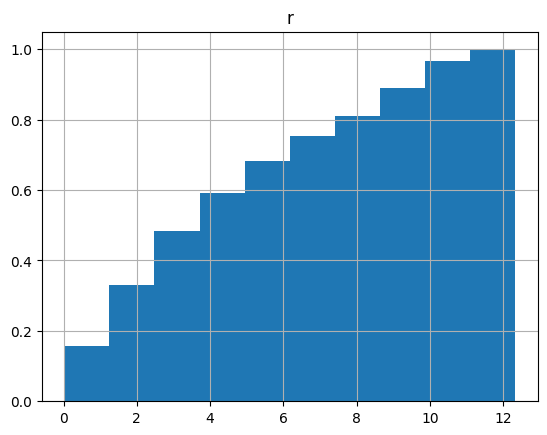

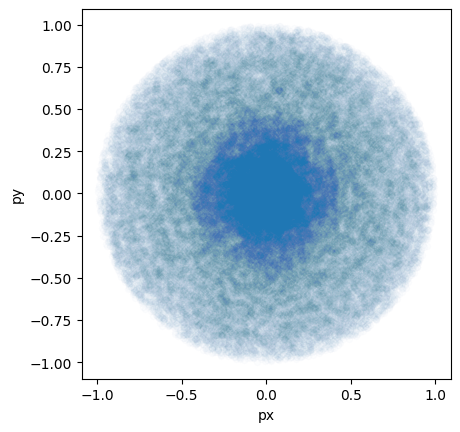

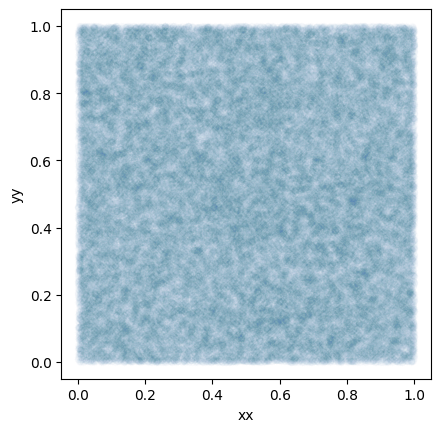

In [38]:
s=pd.read_csv('sample_alta.csv', sep=',', skiprows=11).sample(frac=0.1)
s.astype({'E':'float','px':'float','py':'float','pz':'float','x':'float','y':'float','z':'float'})
s.plot.scatter(x='x',y='y',alpha=0.01).set_aspect('equal')
s['r']=(np.sqrt((s['x']-20)**2+(s['y']-20)**2))
s.hist(column='r', density=True, cumulative = True)
#
s.plot.scatter(x='px',y='py',alpha=0.01).set_aspect('equal')
s['xx']=s['x'] % 1
s['yy']=s['y'] % 1
s.plot.scatter(x='xx',y='yy',alpha=0.01).set_aspect('equal')

<Axes: >

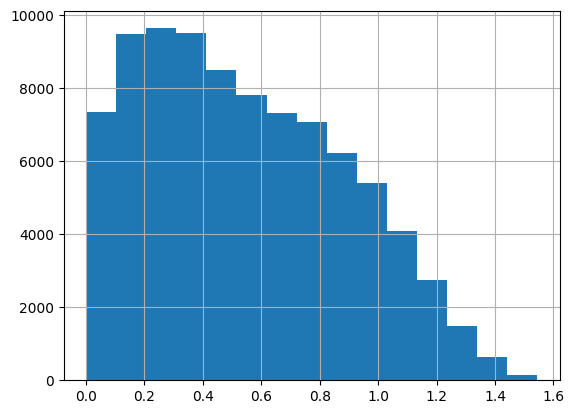

In [39]:
np.arccos(-s['pz']).hist(bins=15)

array([[<Axes: title={'center': 'pr'}>]], dtype=object)

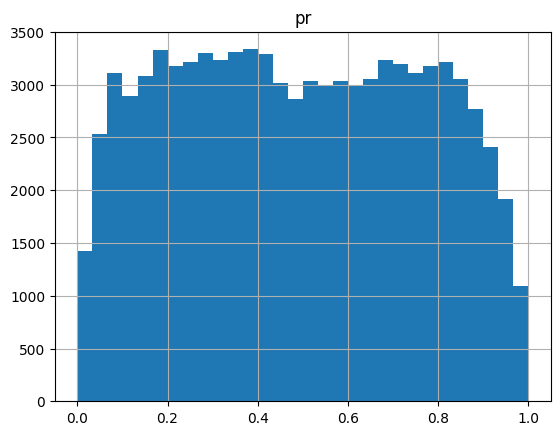

In [40]:
s['pr']=(np.sqrt((s['px'])**2+(s['py'])**2))
s.hist(column='pr',bins=30)

In [45]:
muestra=gR.ProcesosG4('sample_alta.csv',r=7,frac=0.01)

['e+', 'e-', 'gamma', 'neutron', 'proton']
e+
e-
gamma
neutron
proton


In [46]:
muestra.d_salida

,E,Particula,Angulo,N_part,x,y,z,px,py,pz
0,1.708505,e+,0.026835,4.0,0.0,6.975139,0.589432,-0.0,-0.996448,-0.084205
1,3.145641,e+,0.026835,2.0,0.0,6.975139,0.589432,-0.0,-0.996448,-0.084205
2,5.791647,e+,0.026835,4.0,0.0,6.975139,0.589432,-0.0,-0.996448,-0.084205
3,10.663383,e+,0.026835,6.0,0.0,6.975139,0.589432,-0.0,-0.996448,-0.084205
4,19.633057,e+,0.026835,5.0,0.0,6.975139,0.589432,-0.0,-0.996448,-0.084205
...,...,...,...,...,...,...,...,...,...,...
495,2323.787572,proton,0.443058,0.0,0.0,1.245558,6.888293,-0.0,-0.177937,-0.984042
496,3136.053161,proton,0.443058,0.0,0.0,1.245558,6.888293,-0.0,-0.177937,-0.984042
497,4232.241168,proton,0.443058,0.0,0.0,1.245558,6.888293,-0.0,-0.177937,-0.984042
498,5711.594920,proton,0.443058,0.0,0.0,1.245558,6.888293,-0.0,-0.177937,-0.984042


In [47]:
muestra.d_salida_vert

,E,Particula,N_part,x,y,z,px,py,pz
0,1.405482,e+,10.0,0.0,7.0,0.0,0.0,-1.0,0.0
1,2.773229,e+,13.0,0.0,7.0,0.0,0.0,-1.0,0.0
2,5.472003,e+,26.0,0.0,7.0,0.0,0.0,-1.0,0.0
3,10.797093,e+,39.0,0.0,7.0,0.0,0.0,-1.0,0.0
4,21.304307,e+,64.0,0.0,7.0,0.0,0.0,-1.0,0.0
5,42.036639,e+,47.0,0.0,7.0,0.0,0.0,-1.0,0.0
6,82.944683,e+,42.0,0.0,7.0,0.0,0.0,-1.0,0.0
7,163.662475,e+,20.0,0.0,7.0,0.0,0.0,-1.0,0.0
8,322.930957,e+,11.0,0.0,7.0,0.0,0.0,-1.0,0.0
9,637.191898,e+,5.0,0.0,7.0,0.0,0.0,-1.0,0.0


In [48]:
muestra.d_salida_vert['N_part'].sum()

8737.0

In [49]:
muestra.macGun_vert('instruccionesG4.mac')

In [50]:
q=gR.visuales('ED_totales/totalED.csv')

/home/jose/Documents/Proyectos/2023/dosisVuelos/EFR/preparacion/gRAMAkit.py:1465: UserWarning: Log scale: values of z <= 0 have been masked
  im = axs[i, j].contourf(self.capasP[(i*col+j)*muestreo],norm=norm)


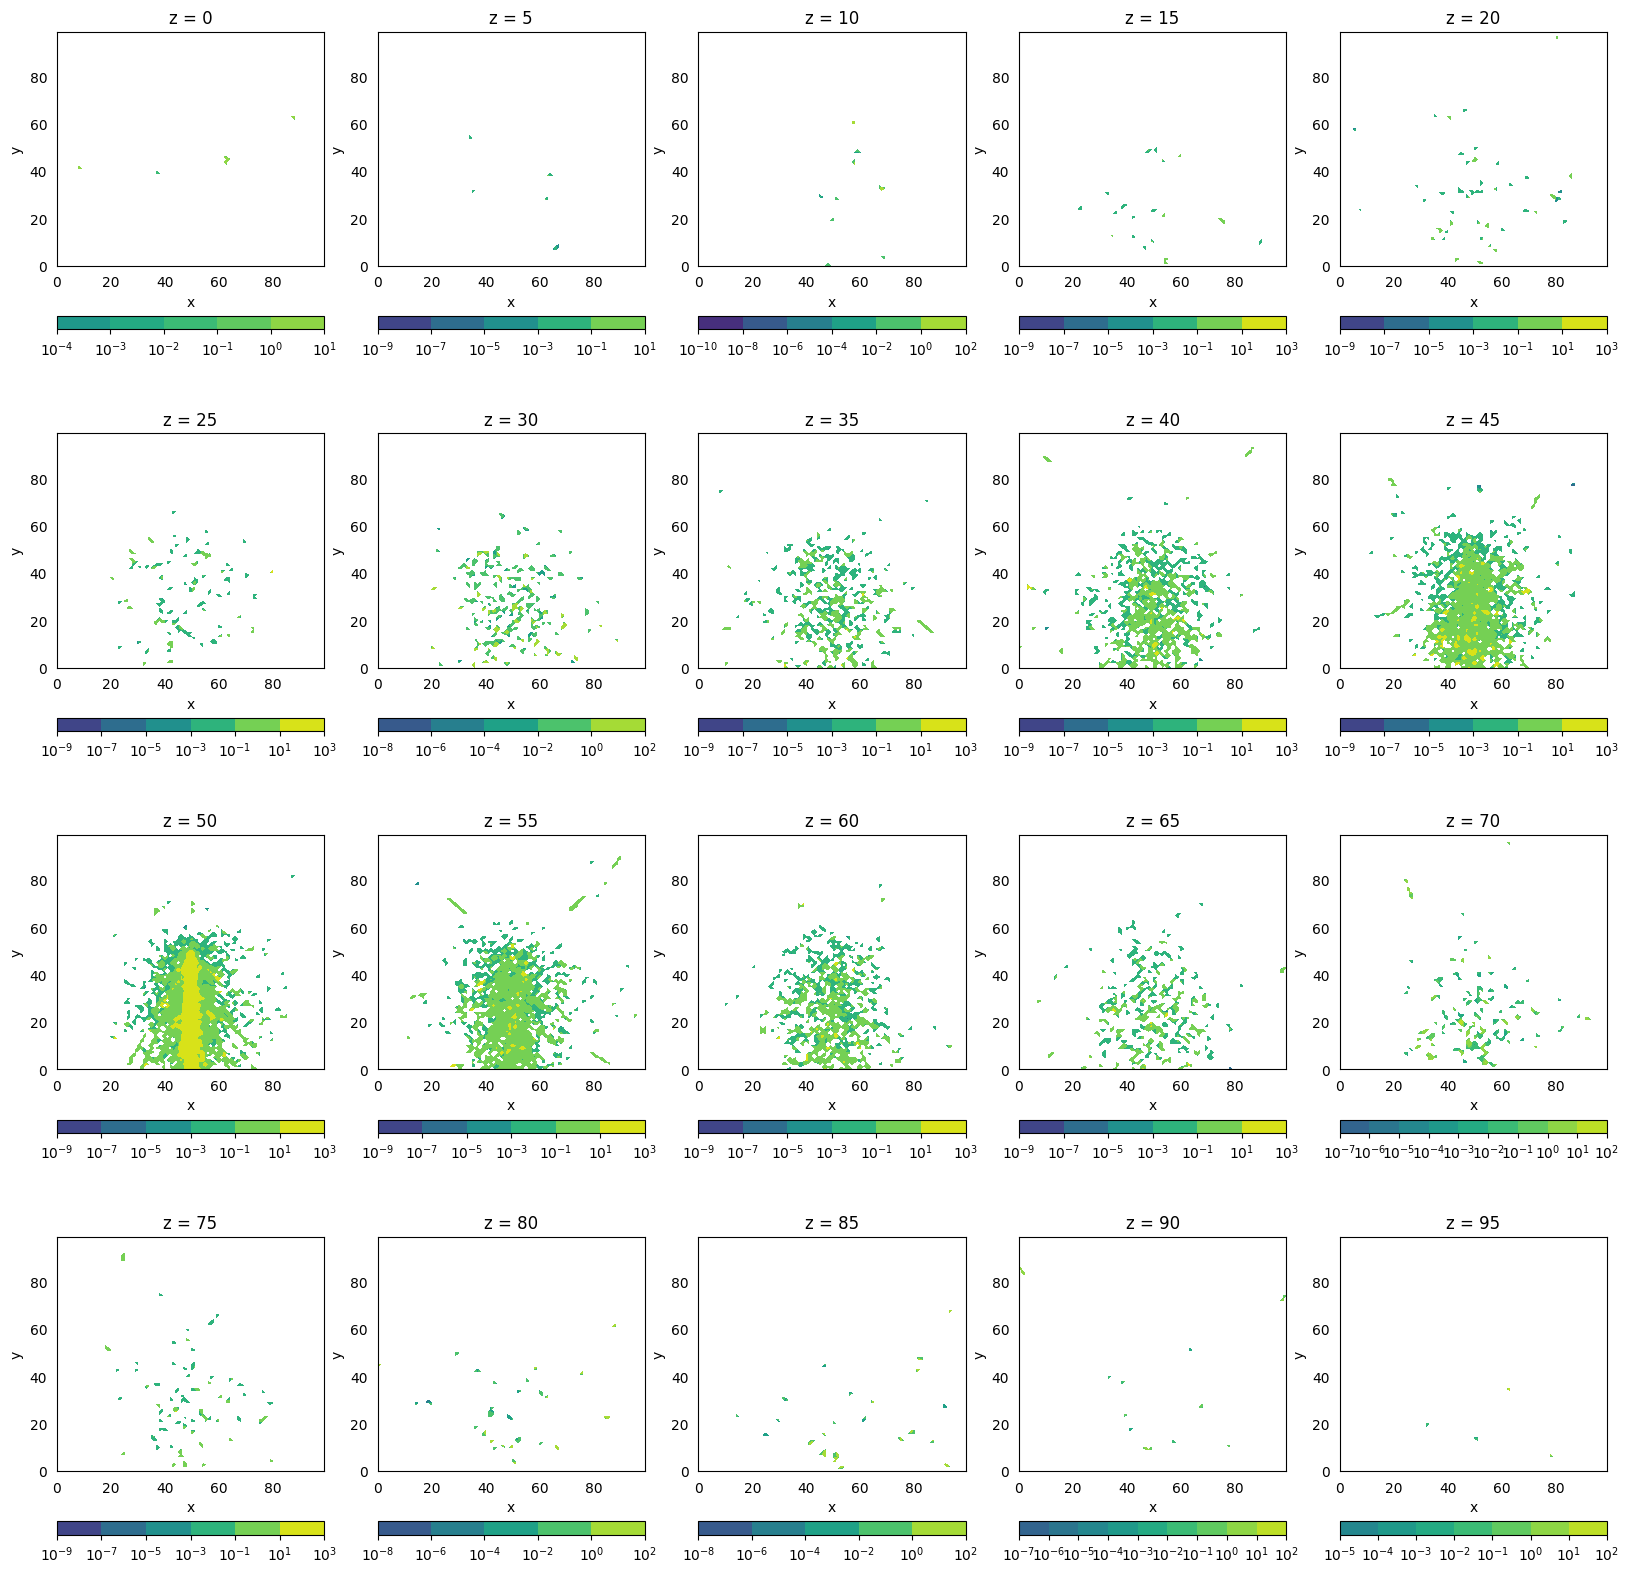

In [51]:
q.CortesEnZ()

/home/jose/Documents/Proyectos/2023/dosisVuelos/EFR/preparacion/gRAMAkit.py:1500: UserWarning: Log scale: values of z <= 0 have been masked
  im = axs[i, j].contourf(self.capasL[(i*col+j)*muestreo],norm=norm)


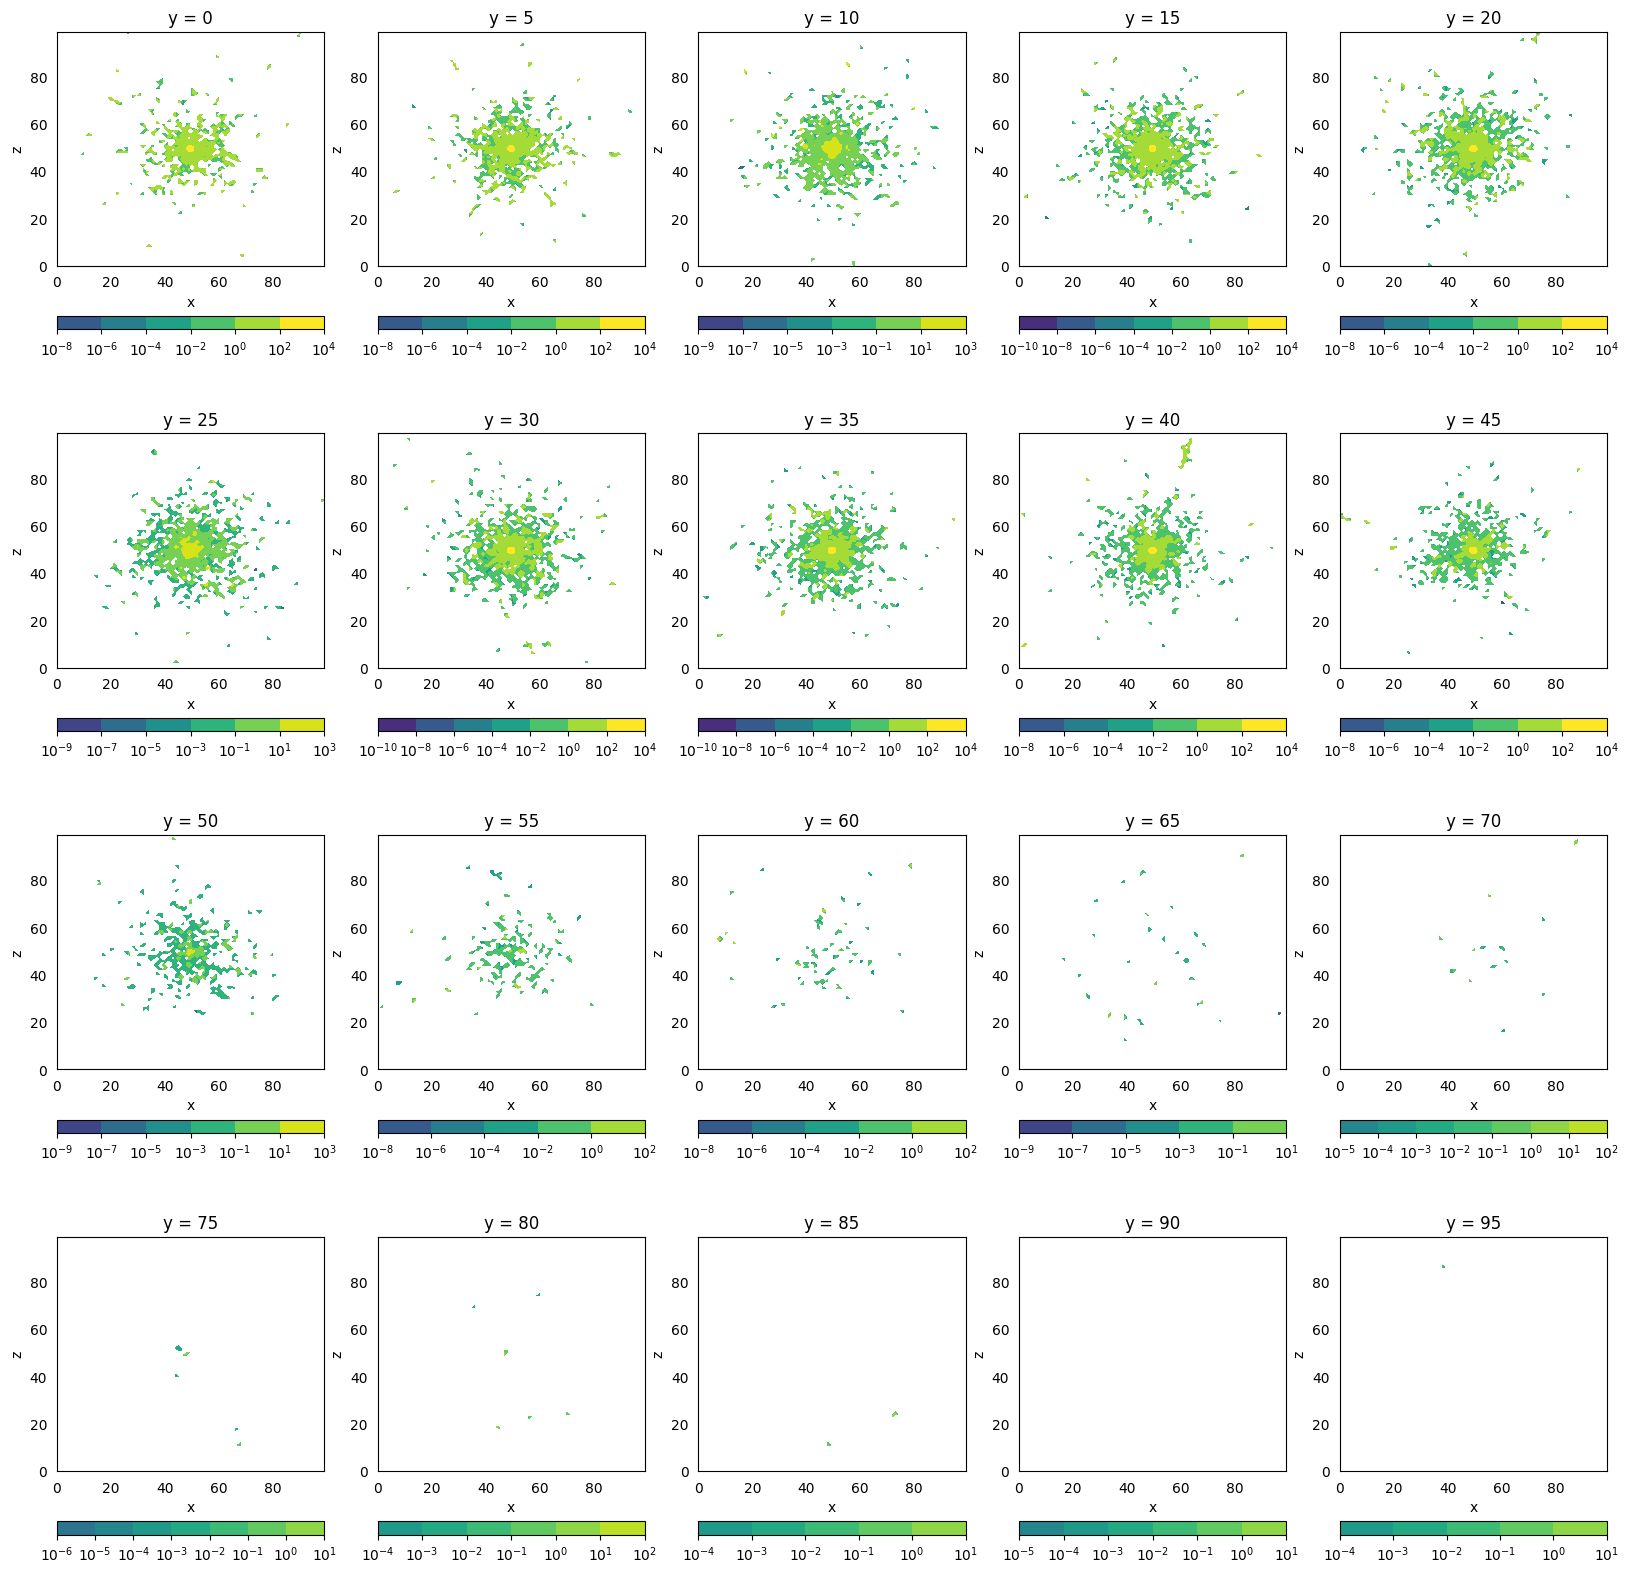

In [52]:
q.CortesEnY()

In [55]:
gR.dosisMediaEqEsfera('totalED_baja.csv',radio=8.66,sample=1e-5,Neutron=True)

22715.339288989955
386.92209994410047 2.430516154266997
579.216738803704 2.12653878264572
867.0790077870116 1.8995838820923021
1298.0046248278431 1.7413814690199172
1943.0939867573516 1.6381134110422275
2908.7833503469546 1.5748520566889224
4354.406239183242 1.5384244434244003
6518.482613556048 1.5186830335773513
9758.073374247815 1.508604450971946
14607.693480562697 1.5037534868224118
20142.908912244213
88662.43587569981


0.17591993277924986

In [54]:
gR.dosisMediaEqEsfera('totalED_alta.csv',radio=8.66,sample=1e-5,Neutron=True)

64421.293015020325
344.87802047365346 2.531296576826618
516.350715907924 2.205121446091748
773.0793091785134 1.956629152617508
1157.4528704371974 1.7800803941460455
1732.9362348436027 1.662712585617172
2594.54883281735 1.5895321362824792
3884.5535747490526 1.5466612223073941
5815.946219331729 1.5230331130074548
8707.62361112351 1.5107688301938476
13037.037498896918 1.5047687415170876
95155.4751919594
184514.82594858922


0.832655656853772